In [1]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\rayan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


## 1 - Load the data

In [2]:
data = pd.read_csv("bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## 2 - Data preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
def label_encode(datas):
    datas = pd.DataFrame(datas)
    types = list(datas.dtypes)
    for i,ty in enumerate(types):
        if ty=="object":
            datas.iloc[:, i] = LabelEncoder().fit_transform(datas.iloc[:, i])
    return datas

In [7]:
x=label_encode(data.iloc[:, 0:16])
y=label_encode(data.iloc[:, 16])

In [8]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [9]:
y

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 30)

In [11]:
x_train.shape

(8371, 16)

In [12]:
y_train.shape

(8371, 1)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3 - Model build

In [14]:
batch_size = 16
epochs = 50

# Create a sequential model here 
model= Sequential([
    Dense(128, input_dim = 16, kernel_initializer = 'uniform', activation='relu'),
    Dense(64, kernel_initializer = 'uniform', activation='relu'),
    Dense(32, kernel_initializer = 'uniform', activation='relu'),
    Dense(16, kernel_initializer = 'uniform', activation='relu'),
    Dense(1, kernel_initializer = 'uniform', activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/50
524/524 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.7706 - val_loss: 0.4271 - val_accuracy: 0.8105
Epoch 2/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4254 - accuracy: 0.8104 - val_loss: 0.4228 - val_accuracy: 0.8097
Epoch 3/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8136 - val_loss: 0.4300 - val_accuracy: 0.8087
Epoch 4/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8188 - val_loss: 0.4250 - val_accuracy: 0.8069
Epoch 5/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4085 - accuracy: 0.8206 - val_loss: 0.4174 - val_accuracy: 0.8090
Epoch 6/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4042 - accuracy: 0.8196 - val_loss: 0.4257 - val_accuracy: 0.8054
Epoch 7/50
524/524 [==============================] - 1s 1ms/step - loss: 0.4024 - accuracy: 0.8240 - val_loss: 0.4172 - val_accuracy: 0.8105
Epoch 

In [16]:
pred = model.predict(x_test)
pred = (pred > 0.5)

In [17]:
pred

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

88/88 - 0s - loss: 0.5537 - accuracy: 0.8087

Test accuracy: 0.808670699596405


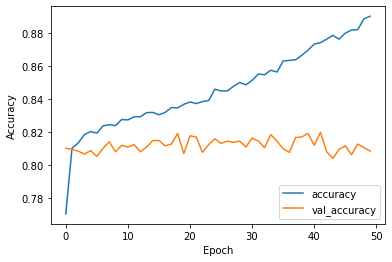

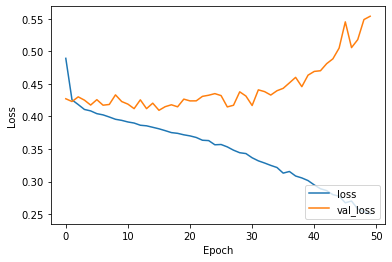

In [18]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)